# Customer Segmentation Report

## Goal:

The purpose of this analysis is to leverage unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. 

We'd like to identify the parts of the general population that are more likely to become part of Arvato future customer base. And, conversely, what parts of general population are less likely to become, and what features determine that.


# 00. Packages & Data
## a. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm    
%matplotlib inline


### my utils
from sklearn.preprocessing import OrdinalEncoder
from unsupervised_utils import *

## b. Data

In [2]:
joint_dataset = pd.read_csv("../arvato_data_processed/joint_dataset_imputed.csv", low_memory = False, index_col = 'Unnamed: 0' )
joint_dataset

,WOHNLAGE,KBA13_KW_50,SEMIO_RAT,KBA05_SEG5,FINANZ_HAUSBAUER,FINANZTYP,GEMEINDETYP,KBA13_KRSHERST_AUDI_VW,D19_BUCH_RZ,KBA13_CCM_2500,...,KBA13_HALTER_65,D19_KONSUMTYP_MAX,SEMIO_ERL,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,GEBAEUDETYP,KBA13_CCM_3001,PRAEGENDE_JUGENDJAHRE_SIM,CAMEO_DEUINTL_2015_SIM
0,6.0,2.0,0.0,3.0,1.0,1.0,6.0,4.0,6.0,4.0,...,3.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0
1,2.0,4.0,1.0,1.0,3.0,1.0,3.0,4.0,0.0,2.0,...,2.0,1.0,6.0,2.0,3.0,2.0,6.0,2.0,1.0,2.0
2,6.0,2.0,2.0,0.0,1.0,5.0,5.0,3.0,6.0,3.0,...,0.0,1.0,2.0,2.0,2.0,4.0,1.0,2.0,0.0,1.0
3,3.0,4.0,4.0,1.0,1.0,1.0,3.0,3.0,2.0,0.0,...,2.0,3.0,3.0,1.0,2.0,2.0,2.0,0.0,3.0,3.0
4,1.0,2.0,1.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,...,2.0,1.0,3.0,1.0,4.0,3.0,0.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932103,3.0,3.0,3.0,2.0,3.0,0.0,3.0,3.0,4.0,3.0,...,3.0,1.0,5.0,3.0,1.0,0.0,6.0,0.0,5.0,3.0
932104,5.0,0.0,3.0,0.0,2.0,5.0,2.0,3.0,0.0,3.0,...,3.0,4.0,6.0,2.0,2.0,2.0,6.0,3.0,4.0,4.0
932105,6.0,3.0,6.0,2.0,2.0,0.0,3.0,2.0,6.0,4.0,...,1.0,1.0,4.0,2.0,3.0,1.0,6.0,2.0,5.0,1.0
932106,5.0,4.0,4.0,1.0,4.0,0.0,1.0,1.0,6.0,1.0,...,2.0,4.0,1.0,2.0,1.0,1.0,6.0,0.0,5.0,4.0


# 01. Feature Scaling

All our our numerical and ordinal/categorical features are represented as numbers. The vast majority of features represent some notion of ordering (numerical/ordinal), while categorical features usually occur in a binary fashion 0/1.

So, I am going to later apply Principal Components Analysis (PCA) on this dataset. Although PCA is used for continuous variables, we might use PCA in this case as a simplified/naive case. As shown below:

[]

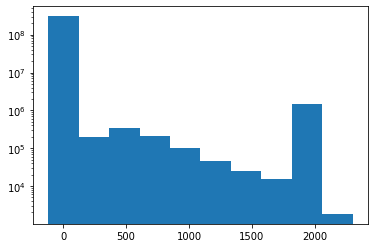

In [3]:
plt.hist(joint_dataset.to_numpy().reshape(-1),log=True)
plt.plot()

features are not standardizes. Some represent numerically the year, some represent a single ingerers (0,1,2,3,... etc). In order to treat each feature equally, regardless of the **scale** of the values it can take, I am going to apply a scikit-learn `StandardScaler`.

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

column_names = joint_dataset.columns
joint_dataset = ss.fit_transform(joint_dataset)

joint_dataset = pd.DataFrame(joint_dataset,columns=column_names)
joint_dataset

,WOHNLAGE,KBA13_KW_50,SEMIO_RAT,KBA05_SEG5,FINANZ_HAUSBAUER,FINANZTYP,GEMEINDETYP,KBA13_KRSHERST_AUDI_VW,D19_BUCH_RZ,KBA13_CCM_2500,...,KBA13_HALTER_65,D19_KONSUMTYP_MAX,SEMIO_ERL,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,GEBAEUDETYP,KBA13_CCM_3001,PRAEGENDE_JUGENDJAHRE_SIM,CAMEO_DEUINTL_2015_SIM
0,1.378786,-0.218516,-1.653814,1.303958,-0.761747,-0.915422,1.723457,1.015723,1.494956,1.048061,...,0.816326,-0.932765,-0.913706,-1.717709,1.829346,-1.071358,-0.686498,0.223500,-1.381526,-1.468939
1,-1.097921,1.175950,-1.050253,-0.431734,0.668244,-0.915422,0.147063,1.015723,-0.725020,-0.363154,...,-0.152763,-0.932765,1.286557,0.197449,0.861047,-0.071787,1.959536,0.223500,-1.381526,-0.111421
2,1.378786,-0.218516,-0.446692,-1.299580,-0.761747,1.044041,1.197992,0.020600,1.494956,0.342453,...,-2.090940,-0.932765,-0.913706,0.197449,-0.107252,1.927355,-0.245492,0.223500,-2.038541,-0.790180
3,-0.478744,1.175950,0.760430,-0.431734,-0.761747,-0.915422,0.147063,0.020600,0.014972,-1.774369,...,-0.152763,0.162547,-0.363641,-0.760130,-0.107252,-0.071787,0.195514,-1.102803,-0.067496,0.567337
4,-1.717097,-0.218516,-1.050253,2.171804,-0.046752,0.554175,-0.903867,0.020600,1.124960,1.753668,...,-0.152763,-0.932765,-0.363641,-0.760130,1.829346,0.927784,-0.686498,0.886652,-1.381526,-0.111421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932103,-0.478744,0.478717,0.156869,0.436112,0.668244,-1.405288,0.147063,0.020600,0.754964,0.342453,...,0.816326,-0.932765,0.736491,1.155028,-1.075551,-2.070929,1.959536,-1.102803,1.246535,0.567337
932104,0.759609,-1.612982,0.156869,-1.299580,-0.046752,1.044041,-0.378402,0.020600,-0.725020,0.342453,...,0.816326,0.710203,1.286557,0.197449,-0.107252,-0.071787,1.959536,0.886652,0.589520,1.246096
932105,1.378786,0.478717,1.967552,0.436112,-0.046752,-1.405288,0.147063,-0.974522,1.494956,1.048061,...,-1.121851,-0.932765,0.186425,0.197449,0.861047,-1.071358,1.959536,0.223500,1.246535,-0.790180
932106,0.759609,1.175950,0.760430,-0.431734,1.383240,-1.405288,-0.903867,-1.969644,1.494956,-1.068762,...,-0.152763,0.710203,-1.463772,0.197449,-1.075551,-1.071358,1.959536,-1.102803,1.246535,1.246096


[]

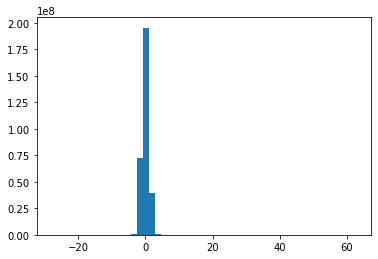

In [5]:
plt.hist(joint_dataset.to_numpy().reshape(-1),log=False,bins=50)
plt.plot()

we see now that jointly the values taken in our dataset resemble a Gaussian with mean 0 and standard deviation of 1. 

# 02. Correlation analysis and feature grouping:



In [6]:
%%time

corr_threshold=0.90

corr =  joint_dataset.corr()
corr_abs = corr.abs()
joint_dataset,corr_abs,deleted_columns,feature_correlated = remove_correlated(joint_dataset,corr_threshold, corr_matrix=corr_abs)

print("Removed {} columns that were above {} correlation threshold".format(len(deleted_columns),corr_threshold))

Removed 18 columns that were above 0.9 correlation threshold
CPU times: user 2min 35s, sys: 4.71 s, total: 2min 40s
Wall time: 2min 40s


For future reference we keep the names of the deleted columns in `deleted_columns` variable, and the columns for which they were highly correlated in a dictionary `feature_correlated` shown below:

In [7]:
feature_correlated

{'GEMEINDETYP': ['ORTSGR_KLS9'],
 'KBA13_KMH_211': ['KBA13_KMH_250'],
 'LP_LEBENSPHASE_FEIN': ['LP_FAMILIE_FEIN', 'LP_LEBENSPHASE_GROB'],
 'LP_FAMILIE_GROB': ['LP_FAMILIE_FEIN'],
 'KBA13_GBZ': ['PLZ8_GBZ'],
 'D19_VERSAND_ONLINE_QUOTE_12': ['D19_GESAMT_ONLINE_QUOTE_12'],
 'LP_STATUS_FEIN': ['LP_STATUS_GROB'],
 'CAMEO_DEU_2015': ['CAMEO_DEUG_2015',
  'CAMEO_DEUINTL_2015',
  'CAMEO_DEUINTL_2015_SIM'],
 'KBA13_ALTERHALTER_61': ['KBA13_HALTER_66'],
 'ANZ_STATISTISCHE_HAUSHALTE': ['ANZ_HAUSHALTE_AKTIV'],
 'PLZ8_ANTG1': ['KBA13_ANTG1'],
 'PLZ8_HHZ': ['KBA13_HHZ'],
 'KBA13_HERST_SONST': ['KBA13_FAB_SONSTIGE'],
 'KBA13_BAUMAX': ['PLZ8_BAUMAX'],
 'PLZ8_ANTG3': ['KBA13_ANTG3'],
 'PRAEGENDE_JUGENDJAHRE': ['PRAEGENDE_JUGENDJAHRE_SIM']}

**For example** we see that `PLZ8_ANTG1` and `KBA13_ANTG1` are highly correlated features, from which `KBA13_ANTG1` was removed.

When looking back to **metadata descripton** `DIAS Attributes - Values 2017` we see that  `PLZ8_ANTG1` refers to "number of 1-2 family houses in the PLZ8", while for feature `KBA13_ANTG1` we lack any metadata description, and due to the common suffix they might refer to very similar feature.

Thus, we remove some 18 highly correlated features in this step of the analysis

Initial correlation matrix indicates that not many features are correlated with each other. I used `abs` to compute an absolute correlation coefficient. At this point we only care about the relative correlation, and not its directionality. 

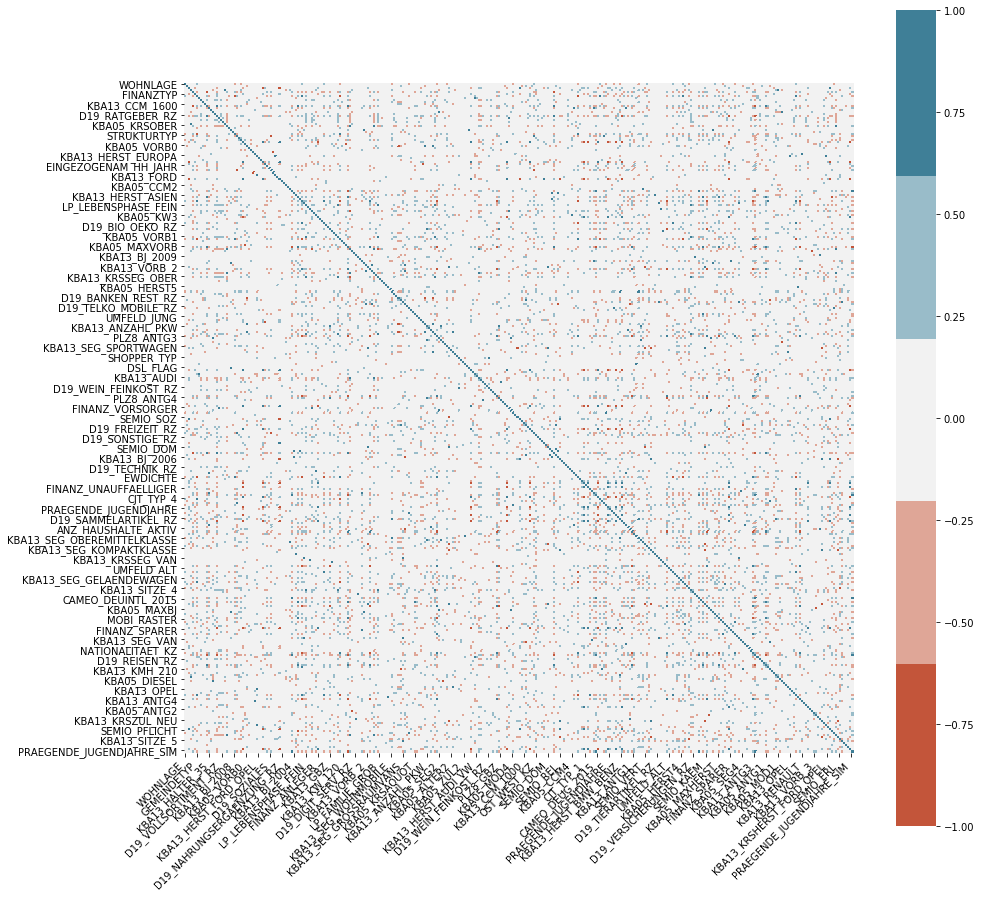

In [8]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 225, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 02. Dimensionality reduction & Variance explained

As we want to cluster our data with many features, it would be beneficial to identifiy the redundancies in our dataset and redue the number of features to address the **curse of dimensionality** problem for clustering high dimensional data.

First. I will look over the variance explained by each features cumulatively, and compress the data so that it retains a significant portion of the variance explained. 

This 90% used below is an arbitrary threshold, a tradeoff between representing data accurately, and reducing the number of features. The compression is done by PCA: we identify ortogonal PC axes, that are a linear combination of features. As each PC is ordered by the importance (i.e. the amount of variance it explains), and we'll "trim" the last PC axes that contribute little to understand the dataset.



In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components= joint_dataset.shape[1])
joint_dataset_PCA = pca.fit_transform(joint_dataset)

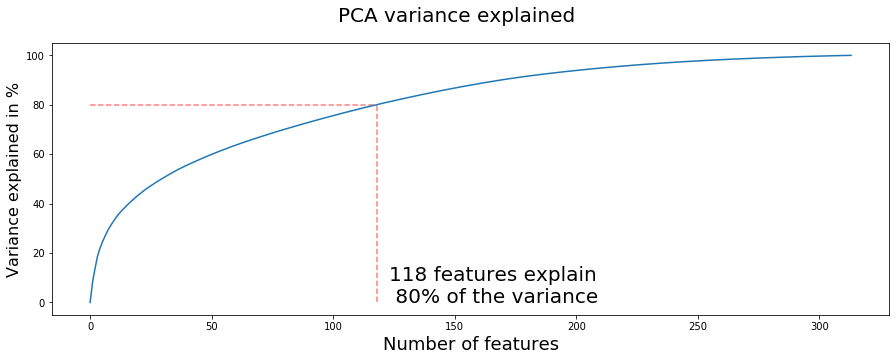

In [10]:
variance_explained(pca,80)

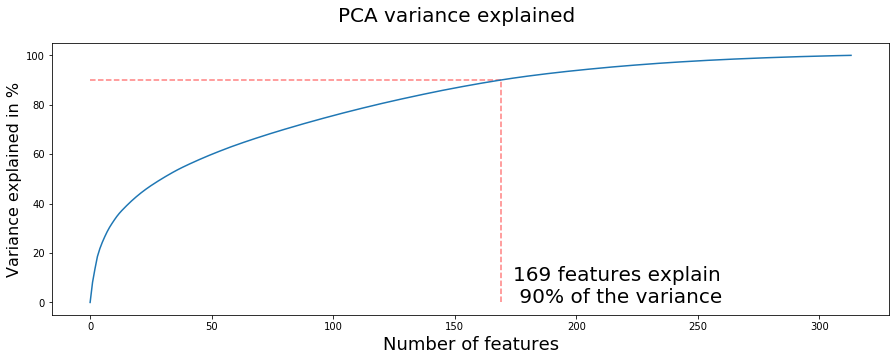

In [11]:
variance_explained(pca,90)

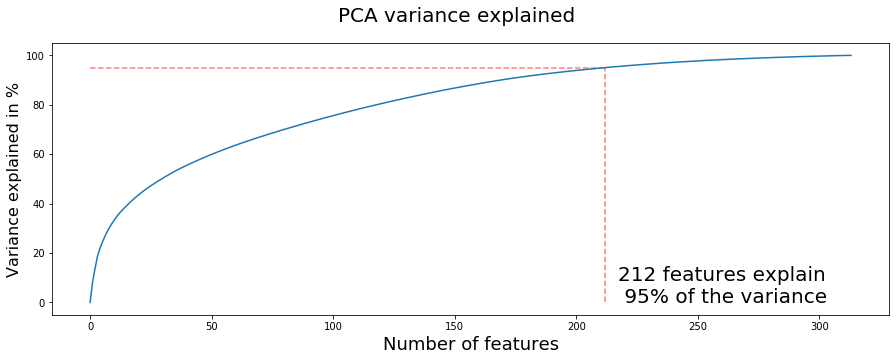

In [12]:
variance_explained(pca,95)

In [67]:
joint_dataset_PCA = pd.DataFrame(joint_dataset_PCA,columns=joint_dataset.columns)
joint_dataset_PCA

,WOHNLAGE,KBA13_KW_50,SEMIO_RAT,KBA05_SEG5,FINANZ_HAUSBAUER,FINANZTYP,GEMEINDETYP,KBA13_KRSHERST_AUDI_VW,D19_BUCH_RZ,KBA13_CCM_2500,...,SEMIO_PFLICHT,KBA05_ANTG4,KBA13_HALTER_65,D19_KONSUMTYP_MAX,SEMIO_ERL,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,GEBAEUDETYP,KBA13_CCM_3001
0,-9.062233,3.157370,-1.721811,-2.170006,-1.547786,2.865146,0.471756,0.165856,0.474610,-1.161704,...,-0.088910,-0.172247,-0.492490,0.179635,0.392852,0.183040,-0.068227,0.236040,0.011452,0.321325
1,-0.810502,5.363877,-5.048631,-0.864640,-3.966620,-2.008304,0.527945,3.296268,-6.126425,1.337177,...,0.283697,-0.085793,0.574184,-0.019968,-0.135624,-0.415264,0.116869,-0.071120,-0.093384,0.013210
2,-5.330974,-0.667991,-3.833049,-1.958598,3.829004,3.244427,0.290823,-3.367991,-0.670713,-1.499038,...,0.249333,0.229398,0.068893,0.261367,-0.117068,-0.289014,-0.127356,0.903613,0.639505,0.231179
3,0.933444,-2.241209,1.373633,4.439451,-5.197515,0.467185,0.028460,-0.132131,1.341134,-2.923680,...,0.231368,0.358873,0.187973,-0.129452,-0.327397,0.707093,0.707794,0.158615,0.056594,-0.042038
4,-6.219264,8.550448,-0.816099,2.923556,0.500454,2.002439,1.228864,1.195174,-2.812966,0.820906,...,0.437257,-0.072492,0.304070,0.162155,-0.206277,-0.312181,-0.208492,0.093183,0.010474,-0.236311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932103,-0.267706,-4.642453,3.625876,0.365359,0.982867,-3.700303,-2.937157,4.985542,1.131732,1.867351,...,-0.809306,-0.295441,0.136908,0.185531,0.108995,0.574008,0.127308,0.015781,-0.114675,0.163038
932104,9.278789,2.640848,0.323042,0.050946,-0.167742,1.385330,-6.237176,-3.486703,-0.844179,-0.591772,...,0.036153,-0.316450,0.084286,0.403056,-0.129927,-0.107723,0.101023,-0.336904,0.603082,-0.254374
932105,-1.158069,-2.497230,6.930512,-2.029406,0.244828,-1.683272,-3.365206,-1.382925,-1.419002,-1.749287,...,0.032637,0.201588,0.063848,-0.010303,-0.327094,-0.113051,-0.008631,0.690432,0.319483,-0.081209
932106,8.683610,-4.230045,1.972982,1.457330,-4.177754,4.148464,-1.453095,2.169899,2.269189,-1.966282,...,0.300212,0.227336,-0.088705,0.212238,-0.160585,0.289369,-0.233317,-0.395437,-0.039247,0.202850


In [72]:
joint_dataset_PCA_reduced = joint_dataset_PCA.iloc[:,:169]
joint_dataset_PCA_reduced.shape

(932108, 169)

# 03. Clustering

## A. Estimating the best number of clusters

- find optimal number of clusters
- show cluster distributions of azdias vs customers

- cluster centroids vs PCA

In [63]:
%%time
sum_of_squared_distances,calinski_harabasz_scores = elbow_kmeans(X=joint_dataset_PCA_reduced, clusters=25)

import pickle

with open('sum_of_squared_distances.pkl', 'wb') as pickle_file:
    pickle.dump(sum_of_squared_distances, pickle_file)

with open('calinski_harabasz_scores.pkl', 'wb') as pickle_file:
    pickle.dump(calinski_harabasz_scores, pickle_file)



2/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
3/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
4/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
5/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
6/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
7/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
8/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
9/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
10/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
11/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
12/25
...Fitted
Computed calinski harabasz score
Computed sum of squares distance score
13/25
...Fitted
Computed calinski haraba

In [23]:
import pickle

with open('calinski_harabasz_scores.pkl', 'rb') as pickle_file:
    calinski_harabasz_scores = pickle.load(pickle_file)

with open('sum_of_squared_distances.pkl', 'rb') as pickle_file:
    sum_of_squared_distances = pickle.load(pickle_file)

It took around 3.5h hours to perform k-means clustering on our dataset with k varying from 2 to 25. Here are the scores:

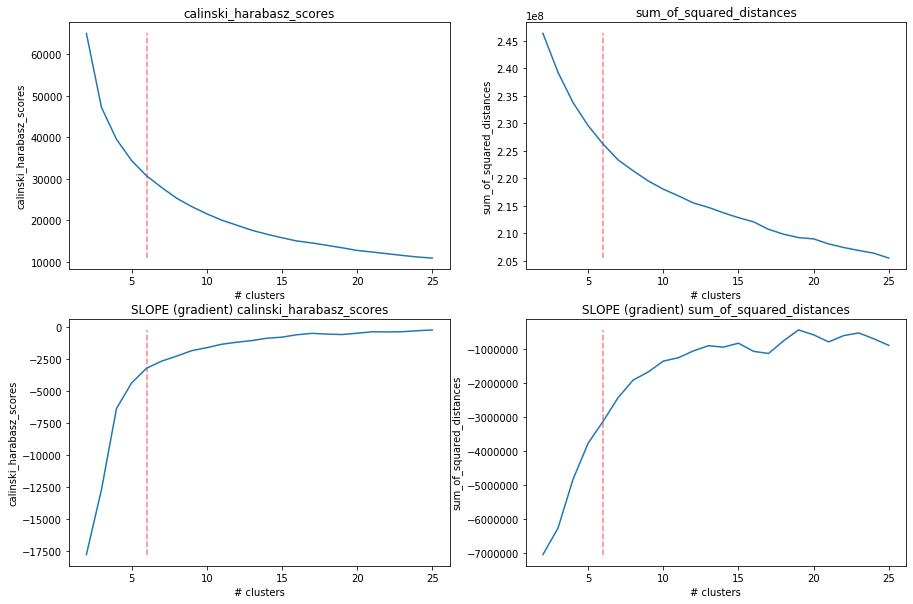

In [24]:
fig,axs = plt.subplots(2,2,figsize=(15,10))

cluster_no = np.arange(2,25+1)

chosen_cluster=6

axs[0,0].plot(cluster_no, calinski_harabasz_scores)
axs[0,0].set_title("calinski_harabasz_scores")
axs[0,0].set_xlabel("# clusters")
axs[0,0].set_ylabel("calinski_harabasz_scores")
axs[0,0].vlines(chosen_cluster,ymax=max(calinski_harabasz_scores),ymin=min(calinski_harabasz_scores),color='red',linestyle='dashed',alpha=0.5)

axs[0,1].plot(cluster_no,sum_of_squared_distances)
axs[0,1].set_title("sum_of_squared_distances")
axs[0,1].set_xlabel("# clusters")
axs[0,1].set_ylabel("sum_of_squared_distances")
axs[0,1].vlines(chosen_cluster,ymax=max(sum_of_squared_distances),ymin=min(sum_of_squared_distances),color='red',linestyle='dashed',alpha=0.5)

axs[1,0].plot(cluster_no,np.gradient(calinski_harabasz_scores))
axs[1,0].set_title("SLOPE (gradient) calinski_harabasz_scores")
axs[1,0].set_xlabel("# clusters")
axs[1,0].set_ylabel("calinski_harabasz_scores")
axs[1,0].vlines(chosen_cluster,ymax=max(np.gradient(calinski_harabasz_scores)),ymin=min(np.gradient(calinski_harabasz_scores)),color='red',linestyle='dashed',alpha=0.5)


axs[1,1].plot(cluster_no,np.gradient(sum_of_squared_distances))
axs[1,1].set_title("SLOPE (gradient) sum_of_squared_distances")
axs[1,1].set_xlabel("# clusters")
axs[1,1].set_ylabel("sum_of_squared_distances")
axs[1,1].vlines(chosen_cluster,ymax=max(np.gradient(sum_of_squared_distances)),ymin=min(np.gradient(sum_of_squared_distances)),color='red',linestyle='dashed',alpha=0.5)


### Choosing the number of clusters (discussion)

Choosing the number of clusters is an arbitrary task. First, let's discuss metrics used:

1. `Calinski-Harabasz score`:  also known as the Variance Ratio Criterion. The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. Hence we want to obtain a minimum possible with the least amount of clusters available (the most conservative approach). If the number of clusters is equal to the number of points, then this score will be 0, but the solution would be far from optimal.

2. ` Inertia or the sum of square distances of samples` to their closest cluster center. The smaller the inertia, the better, but a naive minimization (as with calinski-harabasz score) is ill advised, as with number of clusters equal to the number of points we have a guarantee to obtain a minimum.


Hence, despite having two metrics, the choice of cluster number is arbitrary. And in a thorough experiments each would have to be tested. 


# I am going to assume that the number of clusters is 6
I decided on that number based on the shape of the elbow from both score. I also print the gradient (i.e. derivative) of the scores, to show when the gradients ae becoming "flat" indicating a decrease in the "speed" of metric score decrease.

The optimal solution lies in the range 5-9. With **6 clusters** seeming to offer a nice score minimization, with conservative approach of not inflating the number of clusters.

The last step in deciding on the number of clusters, is to check the cluster assignement stability. 

I implemented a function `cluster_stability` in `unsupervised.utils.py` based on [this github post on scikit-learn page](https://github.com/scikit-learn/scikit-learn/issues/1091). Bascially I randomly sample my dataset, keeping only `percent` of the data (to save the time), and repeat this procedure `n_iter` times. For each iteration I compute the `adjusted_rand_score`.

"from scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html):
> "The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation)."

Thus, a score as close to 1.0 is good

In [50]:
%%time

from sklearn.cluster import KMeans
from sklearn import metrics
estimator = KMeans(n_clusters=6)

cluster_stability_score = cluster_stability(joint_dataset_PCA_reduced.to_numpy(),estimator,percent=.25 ,n_iter=10)
cluster_stability_score

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
CPU times: user 10min 54s, sys: 9.02 s, total: 11min 3s
Wall time: 9min


0.9683810591268979

We see that if we run 10 iterations, each time randomly bootstrap a dataset containing 25% of our dataset, and compute the clustering with **6 clusters**, we obtain a very high adjusted RAND Index, meaning **that 6 clusters assignement** is a very stable measure.

The rand index score is around **0.97**.

---
## B. Cluster Visualization

We know from the notebook `03_Concatenate_and_Impute.ipynb` that:

> "The joint dataset has 932108 rows. The first 140864 rows are coming from customers dataset, the latter 791244 come from general population, i.e. AZDIAS dataset"

hence, we can recover dataset labels for the rows (observations). This is handy, as we can compare general population to ARVATO customer base

In [83]:
estimator.fit(joint_dataset_PCA_reduced)
joint_dataset_PCA_reduced_labels = estimator.predict(joint_dataset_PCA_reduced)

In [209]:
azdias_samples = 791244
customers_samples = 140864 

DataSet_labels = ["customers"]*140864 + ["azdias"]*azdias_samples
assert len(DataSet_labels) == joint_dataset_PCA_reduced_labels.shape[0]

culuster_assignements = pd.DataFrame( {'Cluster': joint_dataset_PCA_reduced_labels,  'DataSet':DataSet_labels  }  )
culuster_assignements['count']=1
culuster_assignements = culuster_assignements.groupby(["DataSet","Cluster"]).count()

a = culuster_assignements.loc[('azdias')]*100/azdias_samples
a['dataset']='azdias'
a['cluster']=a.index


b = culuster_assignements.loc[('customers')]*100/customers_samples
b['dataset']='customers'
b['cluster']=b.index

culuster_assignements = pd.concat([a,b])
del a,b
culuster_assignements


,count,dataset,cluster
Cluster,,,
0,18.681342,azdias,0
1,18.446269,azdias,1
2,22.029993,azdias,2
3,10.182194,azdias,3
4,18.468766,azdias,4
5,12.191435,azdias,5
0,2.528680,customers,0
1,48.110944,customers,1
2,4.179208,customers,2


<Figure size 1800x216 with 0 Axes>

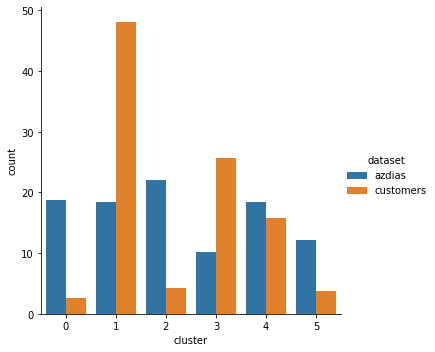

In [208]:
plt.figure(figsize=(25,3))
sns.catplot(x='cluster', y='count', hue='dataset', data=culuster_assignements, kind='bar')
 


## Clusters relative differences between `customers` and general populations `AZDIAS`

Before I go on to explore the characteristics of each cluster, I want to discuss the relative proportions on the above plot. We see that we have **6 clusters**. I plot the relative proportions for Arvato customers (`customers`) and the general population (`azdias`).  Each add separately naturaly to 100%. 

We can observe the following:


Clusters 0,2,5:
    - these are the segments of general population for which Arvato has relatively less customers. Meaning this segment of population is less likely to use the services, as customers from this segment are less prevalent in our customer dataset.
    
Clusters 1,3:
    - these are the segments of general population that are overrepresented in Arvato customer base. Meaning, this segment of population is much more likely (constitutes higher percentage) to use Arvato services.
    
Cluster 4:
    - this is the segment of population that is  equally represented in customers dataset with relatively high percentage. Meaning this is also an important from the business perspective segment of the market.

---
# 05. Feature importance

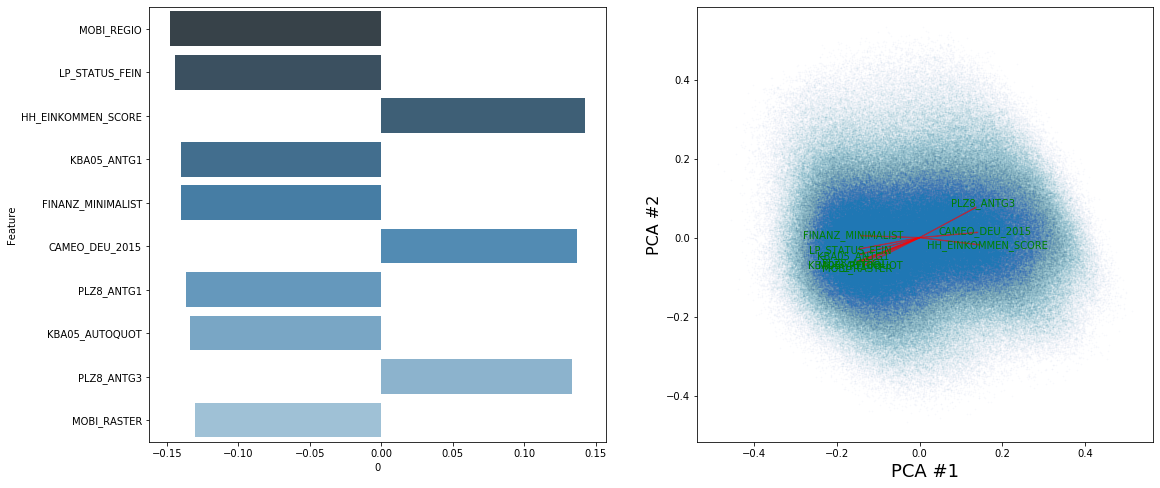

In [56]:
feature_importance_df = pca_explainer(pca = joint_dataset_PCA, 
                    pca_comonents = pca.components_, 
                    features_list = joint_dataset.columns, 
                    pca_num=1, 
                    n_weights=10,
                                      # Plotting/Figure parameters
                    alpha=0.025,
                    size=.5,
                    plot_arrows=True,
                    width=18,height=8)

# 03. Variance explained